## **MNIST: Centralized NN Training to find minimum threshold for achieving certain accuracy**

In [ ]:
import tensorflow as tf
import numpy as np
import json
import time

# Load and normalize the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255.0  # Normalize pixel values to [0, 1]
X_test = X_test / 255.0

# Define the FCNN model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 784
    # tf.keras.layers.Dense(32, activation='relu'),  # First hidden layer
    # tf.keras.layers.Dense(32, activation='relu'),   # Second hidden layer
    tf.keras.layers.Dense(10, activation='softmax') # Output layer (10 digits)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training set
model.fit(X_train, y_train, epochs=15, verbose=1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8108 - loss: 0.7203
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9132 - loss: 0.3060
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9216 - loss: 0.2856
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9248 - loss: 0.2701
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9261 - loss: 0.2626
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9282 - loss: 0.2590
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9303 - loss: 0.2517
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9318 - loss: 0.2481
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9308 - loss: 0.2522
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9310 - loss: 0.2524
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9301 - loss: 0.2507
Epoch 12/15
1875/1875 ━━━━━━━━

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.2669
Test Accuracy: 0.9265


### Run inference on example inputs and calculate inference time

In [ ]:
import matplotlib.pyplot as plt

start_time = time.time()
acc = 0
num_examples = 100

# Run inference on the first n example inputs
for i, example in enumerate(X_test[0:num_examples]):
  example = example.reshape(1, 28, 28)
  predictions = model.predict(example, verbose=0)
  predicted_class = np.argmax(predictions[0])
  if predicted_class == y_test[i]:
    acc += 1
  # print(f"Predicted class: {predicted_class}, True class: {y_test[i]}")

end_time = time.time()
inference_time = end_time - start_time
print(f"Inference time: {inference_time:.4f} seconds")
print(f"Accuracy: {acc/num_examples * 100}%")

Inference time: 9.9891 seconds
Accuracy: 96.0%


## **MNIST: Centralised NN measurement of certain metrics**
- Inference Accuracy
- Precision
- Recall
- F1 Score
- Inference Latency



In [ ]:
import tensorflow as tf
import numpy as np
import json
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


- Split into 90% and 10%
- Copy 10% 10 times
- Run inference on 10 x 10% and record time
- Store weights of 90% trained NN


In [ ]:

# Load and normalize MNIST data
(X_full, y_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_full = X_full / 255.0

# Split into 90% training and 10% inference data
split_index = int(0.9 * len(X_full))
X_train, X_infer = X_full[:split_index], X_full[split_index:]
y_train, y_infer = y_full[:split_index], y_full[split_index:]

# Duplicate the 10% inference set 5 times
X_infer_large = np.tile(X_infer, (10, 1, 1))
y_infer_large = np.tile(y_infer, 10)

print(f"X_train shape: {X_train.shape} | y_train shape: {y_full.shape}")
print(f"X_test_infer shape: {X_infer_large.shape} | y_test_infer shape shape: {y_infer_large.shape}")

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on 90% of the dataset
model.fit(X_train, y_train, epochs=30, verbose=1)

X_train shape: (54000, 28, 28) | y_train shape: (60000,)
X_test_infer shape: (60000, 28, 28) | y_test_infer shape shape: (60000,)
Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7657 - loss: 0.7545
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9419 - loss: 0.2034
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9568 - loss: 0.1510
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9626 - loss: 0.1269
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9689 - loss: 0.1065
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9710 - loss: 0.0941
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9753 - loss: 0.0827
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9763 - loss: 0.0766
Epoch 9/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9788 - loss: 0.0689
Epoch 10/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9804 - lo

Dataset shape: (60000, 28, 28) 
 Labels shape: (60000,)
Inference Accuracy: 0.9685
Precision: 0.9691, Recall: 0.9685, F1 Score: 0.9686
Total Latency: 4.5490 seconds
Average Latency per Sample: 0.000076 seconds


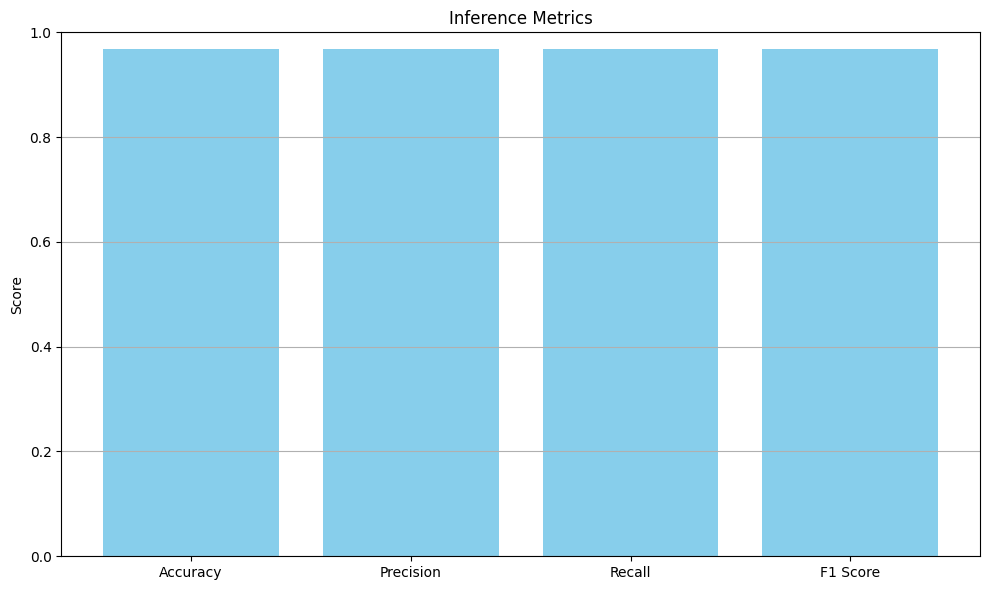

In [ ]:

# Inference with latency measurement
start_time = time.time()
y_pred_probs = model.predict(X_infer_large, verbose=0)
end_time = time.time()

# Calculate predictions and metrics
y_pred = np.argmax(y_pred_probs, axis=1)
inference_accuracy = accuracy_score(y_infer_large, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_infer_large, y_pred, average='weighted', zero_division=0)
total_latency = end_time - start_time
avg_latency_per_sample = total_latency / len(X_infer_large)

print(f"Dataset shape: {X_infer_large.shape} \n Labels shape: {y_infer_large.shape}")

# Print metrics
print(f"Inference Accuracy: {inference_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
print(f"Total Latency: {total_latency:.4f} seconds")
print(f"Average Latency per Sample: {avg_latency_per_sample:.6f} seconds")

# Plot metrics
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [inference_accuracy, precision, recall, f1]
plt.bar(metrics, values, color='skyblue')
plt.ylim(0, 1)
plt.title('Inference Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.tight_layout()
# plt.savefig("inference_metrics.png")
plt.show()

In [ ]:
# # Prepare and save examples with labels
# examples = []
# for i in range(len(X_infer_large)):
#     image = X_infer_large[i].flatten().tolist()
#     label = int(y_infer_large[i])
#     examples.append({
#         "input": image,
#         "label": label
#     })

# with open('mnist_examples_labels.json', 'w') as f:
#     json.dump({"examples": examples}, f, indent=4)
# print(f"Saved {X_infer_large.shape} inputs with {y_infer_large.shape} labels to 'mnist_examples.json'")

# Prepare and save model weights
layers_list = []
for layer in model.layers:
    if len(layer.get_weights()) > 0:
        weights, biases = layer.get_weights()
        num_nodes = biases.shape[0]
        neurons = []
        for j in range(num_nodes):
            neuron_weights = weights[:, j].tolist()
            neuron_bias = float(biases[j])
            activation_fn = layer.activation
            if activation_fn == tf.keras.activations.relu:
                activation = "relu"
            elif activation_fn == tf.keras.activations.softmax:
                activation = "softmax"
            else:
                activation = "unknown"
            neurons.append({
                "weights": neuron_weights,
                "bias": neuron_bias,
                "activation": activation
            })
        layer_type = "output" if layer == model.layers[-1] else "hidden"
        layers_list.append({
            "type": layer_type,
            "nodes": num_nodes,
            "neurons": neurons
        })

model_dict = {
    "model": {"layers": layers_list},
    "inference_metrics": {
        "accuracy": inference_accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "total_latency_sec": total_latency,
        "avg_latency_per_sample_sec": avg_latency_per_sample
    }
}

with open('mnist_model(10).json', 'w') as f:
    json.dump(model_dict, f, indent=4)
print("Saved model weights and inference metrics to 'mnist_model.json'")


Saved model weights and inference metrics to 'mnist_model.json'


In [ ]:
image_size = X_infer_large[0].nbytes
print(f"Image Size (Bytes): {X_infer_large[0].nbytes} bytes")
print(f"Image Shape: {X_infer_large[0].shape} bytes")


Image Size (Bytes): 6272 bytes
Image Shape: (28, 28) bytes
